# Qubits, Paridad e Ising 

- original_integer
- base_2
- rotate 
- Operador K 
- Diagonalización por bloques ¿?

In [29]:
using LinearAlgebra
using Plots

In [30]:
# Primero definimos algunas funciones auxiliares que nos ayudarán a convertir de un número a una lista de bits y viceversa.
"""
La función convierte un número en binario a su entero original.
"""
function original_integer(list)
    return parse(Int, join(list); base=2)
end

"""
Recibe un entero y lo escribe en binario, el pad nos dice qué tantos ceros tendrá la representación binaria e.g pad = 2 es 00, pad = 3 es 000
"""
function base_2(integer; pad= nothing)
    if pad == nothing
        return reverse(digits(integer, base = 2))
    else
        return reverse(digits(integer, base = 2, pad = pad))
    end
end

base_2

## Hola

In [31]:
A = base_2(5; pad=nothing)
@doc original_integer
@doc base_2

ErrorException: cannot document the following expression:

(Base.Docs.doc)((Base.Docs.Binding)(Main, :base_2))


In [32]:
original_integer([1,1,1,1,1])

31

In [33]:
function rotate(index,N)
    vec = base_2(index, pad=N)
    return original_integer([vec[end];vec[1:end-1]]), index
end

rotate (generic function with 1 method)

In [34]:
rotate(1,3)

(4, 1)

In [59]:
m = 3 # Número de Qubits
function OperatorK(m) # m = particles
    am = original_integer(fill(1,m))
    A = zeros(am+1,am+1) #la primer posición es el cero

    for i in 0:am # m es el número de qubits 
       A[ rotate(i,m)[1]+1, i+1 ] = 1
    end
    return A
end
OperatorK(3)

8×8 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [74]:
# En un campo externo h 
J = 1
function IsingHomogeneo(N,b; cerrada = false) #Keyword Arguments
    H = 0
    totalparticulas = N
    if cerrada == false 
        M = (N - 1)
    elseif cerrada == true 
        M = N 
    end

    for i in 0:(M-1)
        H = H .+ J*(Sigma(3, mod(i,N),totalparticulas)*Sigma(3,mod((i+1),N),totalparticulas))
    end
    for j in 0:N-1
        H = H .+ b*Sigma(1,j,totalparticulas)
    end
    return H 
end

IsingHomogeneo (generic function with 1 method)

In [240]:
function ProjectionParity(N,b, Bloque; cerrada = false)
    H = IsingHomogeneo(N,b, cerrada = false)
    # P = parity(N)
    OpK = OperatorK(N)
    # vals, v = eigen(P) 
    valsK, vecK = eigen(OpK)
    valsunique = roundedvals(valsK)[1]
    vals = roundedvals(valsK)[2]

    Bloques = Dict()
    for i in 1:length(valsunique)
        Bloques[i] = length(findall(vals .== valsunique[i]))
    end

    vec = vecK[:, findall(vals .== valsunique[Bloque])]

    num = Bloques[Bloque]
    Projection = zeros(ComplexF64,num,num)

    for k in 1:num
        for j in 1:num
            Projection[j,k] = vec[:,j]'*H*vec[:,k]
        end
    end
    return Projection
end

ProjectionParity (generic function with 2 methods)

In [244]:
ProjectionParity(4,1,1,cerrada = false)

4×4 Matrix{ComplexF64}:
     -3.0+0.0im      1.41421+0.0im     -1.41421+0.0im           0.0+0.0im
  1.41421+0.0im          0.0+0.0im          0.0+0.0im   3.69779e-32+0.0im
 -1.41421+0.0im          0.0+0.0im          0.0+0.0im   3.69779e-32+0.0im
      0.0+0.0im  3.69779e-32+0.0im  3.69779e-32+0.0im  -2.22045e-16+0.0im

In [250]:
N = 4
listProj1 = []
for b in 0:0.01:1
     H1 = ProjectionParity(N,b,1,cerrada = false)
     ValsProj1 = eigen(H1).values
     append!(listProj1,map(x->[b,x],ValsProj1))
end
x_listProj = [l[1] for l in listProj1]
y_listProj = [l[2] for l in listProj1]

listProj2 = []
for b in 0:0.01:1
     H2 = ProjectionParity(N,b,2, cerrada = false)
     ValsProj2 = eigen(H2).values
     append!(listProj2,map(x->[b,x],ValsProj2))
end
x_listProj2 = [l[1] for l in listProj2]
y_listProj2 = [l[2] for l in listProj2]

listProj3 = []
for b in 0:0.01:1
     H3 = ProjectionParity(N,b,3, cerrada = false)
     ValsProj3 = eigen(H3).values
     append!(listProj3,map(x->[b,x],ValsProj3))
end
x_listProj3 = [l[1] for l in listProj3]
y_listProj3 = [l[2] for l in listProj3]

listProj4 = []
for b in 0:0.01:1
     H4 = ProjectionParity(N,b,4, cerrada = false)
     ValsProj4 = eigen(H4).values
     append!(listProj4,map(x->[b,x],ValsProj4))
end
x_listProj4 = [l[1] for l in listProj4]
y_listProj4 = [l[2] for l in listProj4]

606-element Vector{Number}:
     -2.9999999999999996 + 0.0im
 -3.3306690738754696e-16 + 0.0im
 -1.1102230246251565e-16 + 0.0im
  1.1102230246251565e-16 + 0.0im
                     3.0 + 0.0im
                     3.0 + 0.0im
                        -3.0001333422218135
                        -0.028283014140812135
                        -0.0001333274079335922
                         0.028283014140815244
                         ⋮
      1.8167107708565278 + 0.0im
      3.9840289853381323 + 0.0im
      4.6239768571062125 + 0.0im
                        -4.656047666781651
                        -1.8224215002729407
                        -0.9999999999999982
                         1.8224215002729451
                         3.999999999999999
                         4.656047666781657

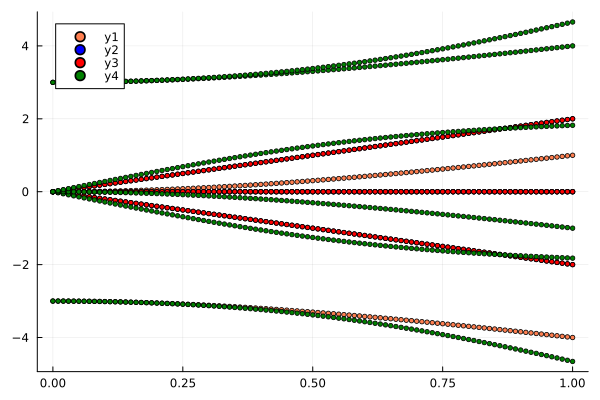

In [252]:
scatter(real(x_listProj),real(y_listProj), color = "coral", markersize =2.5)
scatter!(real(x_listProj2), real(y_listProj2), color = "blue", markersize = 2.5)
scatter!(real(x_listProj3), real(y_listProj3), color = "red", markersize = 2.5)
scatter!(real(x_listProj4), real(y_listProj4), color = "green", markersize = 2.5)


In [86]:
function roundedvals(valsK)
    rounded_vals = round.(valsK,digits=5)
    final_vals = []
    for (val, round_val) in zip(valsK, rounded_vals)
        if norm(round_val - val) < 1e-3
            push!(final_vals, round_val)
        else
            push!(final_vals, val)
        end
    end
    final_vals_unique = unique(final_vals)
    return final_vals_unique, final_vals
end
#rounded_vals
roundedvals(valsK)[1][2]

1.0

In [126]:
findall(final_vals .== final_vals_unique[1])
vec = vecK[:, findall(final_vals .== final_vals_unique[1])]
length(vec/2^2)
findall(final_vals .== final_vals_unique[2])

3-element Vector{Int64}:
 2
 3
 4

In [39]:
# Define a tolerance for floating-point comparisons
tolerance = 1e-8

# Custom function to check if two complex numbers are approximately equal
function is_approx_equal(x, y)
    return norm(x - y) < tolerance
end

# Filter unique values using the custom comparison
filtered_vals = []
for v in vals
    if all(!is_approx_equal(v, fv) for fv in filtered_vals)
        push!(filtered_vals, v)
    end
end

function custom_unique(list)
    filtered_vals = []
    for v in list
        if all(!is_approx_equal(v, fv) for fv in filtered_vals)
            push!(filtered_vals, v)
        end
    end
    return filtered_vals
end

custom_unique (generic function with 1 method)

In [40]:
custom_unique(rounded_vals)

12-element Vector{Any}:
     -1.0 + 0.0im
 -0.86603 - 0.5im
 -0.86603 + 0.5im
     -0.5 - 0.86603im
     -0.5 + 0.86603im
      0.0 - 1.0im
      0.0 + 1.0im
      0.5 - 0.86603im
      0.5 + 0.86603im
  0.86603 - 0.5im
  0.86603 + 0.5im
      1.0 + 0.0im

In [50]:
findall(rounded_vals .== final_vals_unique[3]) # Aquí antes estaba valsK pero no me daba ningún valor, sospecho porque eran distintos 
# pues tiene más decimales
# final_vals_unique[3]
findall(valsK .== final_vals_unique[3])

Int64[]

In [42]:

#O simplemente dentro de la matriz de eigenvectores
vec = vecs[:, findall(valsK .== final_vals_unique[3])]

16×0 Matrix{Float64}

In [43]:
N = 4
num = original_integer(fill(1,N))
V = zeros(N,num)
for i in 1:num
   V[:,i]=  base_2(i,pad=N)
end
V

4×15 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0
 1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0

In [44]:
num

15

In [45]:
# Definición de las matrices de Pauli
sigmax = [0 1.0; 1 0]
sigmay = [0 -1.0im; im 0]  # im representa la unidad imaginaria √(-1)
sigmaz = [1.0 0; 0 -1]
sigmas = Dict(1=>sigmax, 2=>sigmay, 3=>sigmaz)
J = 1
h = 1
function Sigma(indice, pos, totalparticulas)
    id = I(2) #[1.0 0; 0 1.0]
    mat = sigmas[indice]
    list = []
    for i in 0:totalparticulas-1
        if i == pos 
            append!(list,[mat])
        else 
            append!(list,[id])
        end
        #println("$list")
    end
    return kron(list...)
end

# Para la cadena abierta con n partículas tenemos usamos cerrada = false, para la cadena cerrada usamos cerrada = true
function Ising(N; cerrada = false) #Keyword Arguments
    H = 0
    totalparticulas = N
    if cerrada == false 
        M = (N - 1)
    elseif cerrada == true 
        M = N 
    end

    for i in 0:(M-1)
        H = H .+ J*(Sigma(3, mod(i,N),totalparticulas)*Sigma(3,mod((i+1),N),totalparticulas))
    end
    for j in 0:N-1
        H = H .+ h*Sigma(1,j,totalparticulas)
    end
    return H 
end

Ising (generic function with 1 method)

In [46]:
Ising(3, cerrada = true)

8×8 Matrix{Float64}:
 3.0   1.0   1.0   0.0   1.0   0.0   0.0  0.0
 1.0  -1.0   0.0   1.0   0.0   1.0   0.0  0.0
 1.0   0.0  -1.0   1.0   0.0   0.0   1.0  0.0
 0.0   1.0   1.0  -1.0   0.0   0.0   0.0  1.0
 1.0   0.0   0.0   0.0  -1.0   1.0   1.0  0.0
 0.0   1.0   0.0   0.0   1.0  -1.0   0.0  1.0
 0.0   0.0   1.0   0.0   1.0   0.0  -1.0  1.0
 0.0   0.0   0.0   1.0   0.0   1.0   1.0  3.0

In [56]:
vals, vecs = eigen(Ising(N, cerrada = true));
rounded_vals = round.(vals,digits=5)
final_vals = []
for (val, round_val) in zip(vals, rounded_vals)
    if norm(round_val - val) < 1e-3
        push!(final_vals, round_val)
    else
        push!(final_vals, val)
    end
end
final_vals_unique=unique(final_vals)

12-element Vector{Any}:
 -5.22625
 -4.82843
 -2.16478
 -2.0
 -0.82843
 -0.0
  0.0
  0.82843
  2.0
  2.16478
  4.82843
  5.22625

In [ ]:
@show findall(final_vals .== final_vals_unique[6])
#final_vals_unique[6]

findall(final_vals .== final_vals_unique[6]) = [7, 8, 9, 10]


4-element Vector{Int64}:
  7
  8
  9
 10

In [57]:
vec = vecs[:, findall(final_vals .== final_vals_unique[1])]

16×1 Matrix{Float64}:
  0.07664074121909374
 -0.17677669529663656
 -0.17677669529663656
  0.13529902503654986
 -0.17677669529663653
  0.5766407412190937
  0.13529902503654984
 -0.17677669529663737
 -0.17677669529663653
  0.1352990250365499
  0.5766407412190937
 -0.17677669529663734
  0.13529902503654978
 -0.17677669529663756
 -0.17677669529663725
  0.07664074121909455